<a href="https://colab.research.google.com/github/Azay961/CODESOFT/blob/main/Movie_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install seaborn pandas numpy matplotlib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1. Load the Dataset

In [4]:
# path = r"D:\My_Laptop\Downloads\CodeSoft\Genre Classification Dataset\train_data.txt"
path = r"/content/train_data.txt"

column_names = ['ID', 'Title', 'Genre', 'Description']
train_data = pd.read_csv(path, sep=' ::: ', names=column_names, engine='python')
train_data.head()

,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [5]:
train_data.shape

(3178, 4)

## Step 2 Exploratory Data Analysis

In [6]:
train_data.isna().sum()

,0
ID,0
Title,0
Genre,0
Description,0


In [7]:
train_data.loc[0, "Description"]

'Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.'

In [8]:
# visualizing overall Word Cloud from the given data
# !pip install wordcloud
from wordcloud import WordCloud

def viz_word_cloud(doc):
    wc = WordCloud(background_color='black',
                   width=1600,
                   height=800).generate(' '.join(doc))
    plt.figure(figsize=(30,20))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

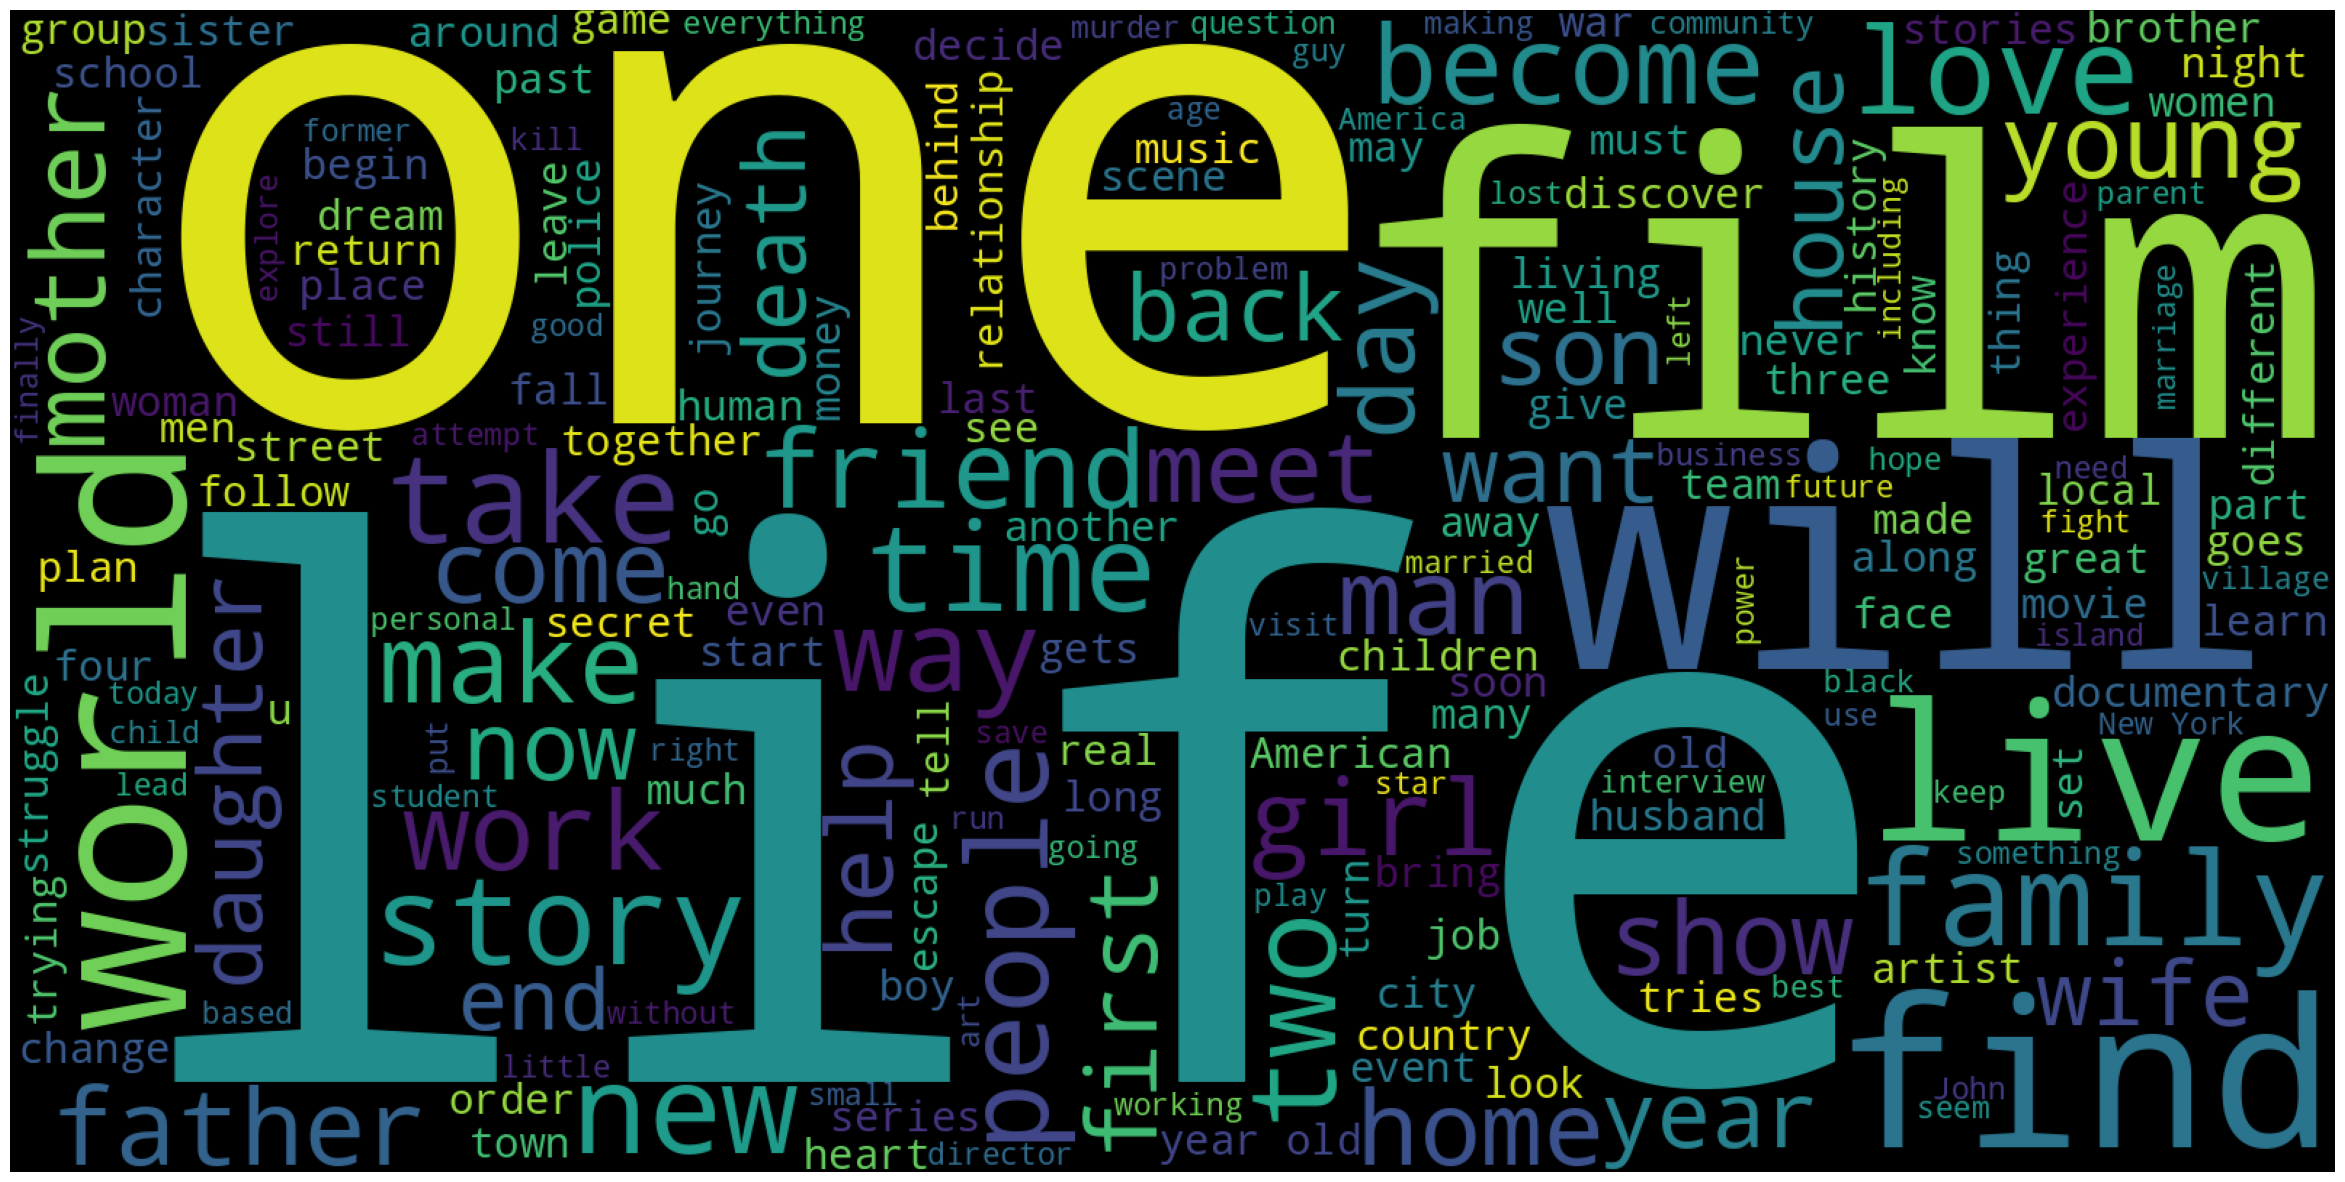

In [9]:
viz_word_cloud(train_data['Description'])

## Exploring the Data distribution of Target variable

In [10]:
train_data["Genre"].value_counts(normalize=True)

,proportion
Genre,
drama,0.251416
documentary,0.235683
comedy,0.138767
short,0.099119
horror,0.040592
thriller,0.035242
action,0.025173
reality-tv,0.018880
western,0.018565


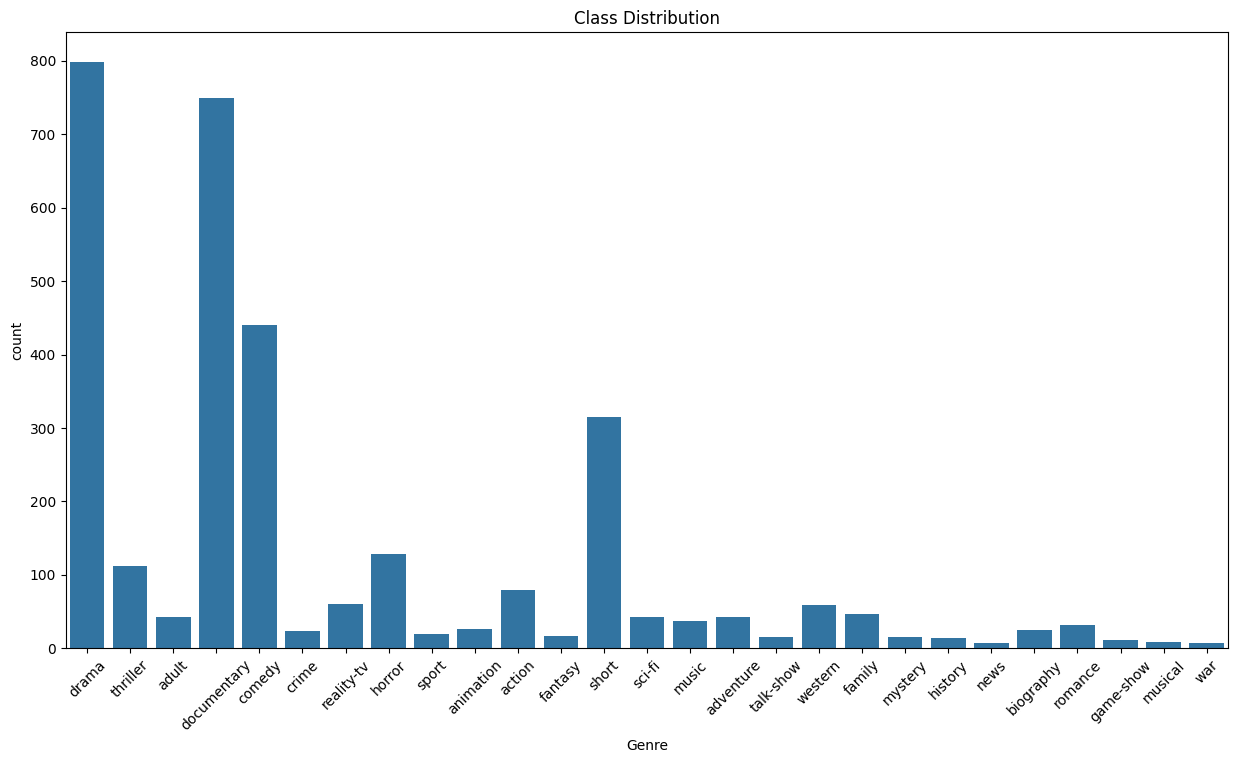

In [11]:
# visualizing it

fig, ax = plt.subplots(figsize=(15,8))

ax.set_title("Class Distribution")
sns.countplot(data=train_data, x="Genre")
plt.xticks(rotation=45)
plt.show()

## Visualizing most frequent Words

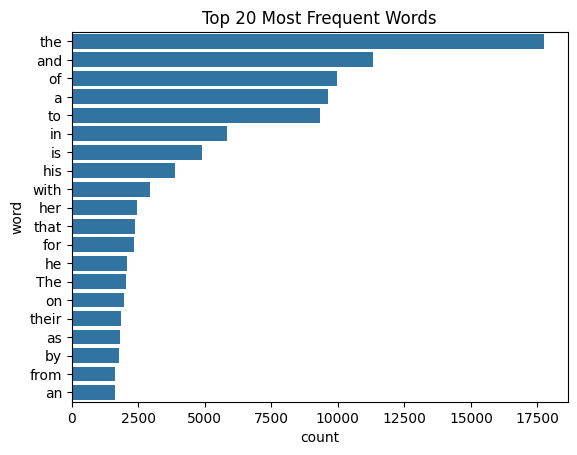

In [12]:
# !pip install collection
def viz_frequent_words(doc):
    from collections import Counter

    # Get all words in the text
    all_words = " ".join(doc.values).split()
    word_counts = Counter(all_words)

    # Get the most common words
    common_words = word_counts.most_common(20)

    # Convert to DataFrame for plotting
    common_words_df = pd.DataFrame(common_words, columns=['word', 'count'])

    # Plot the most common words
    sns.barplot(data=common_words_df, x='count', y='word')
    plt.title('Top 20 Most Frequent Words')
    plt.show()

viz_frequent_words(train_data['Description'])

## Step 3 Data Preprocessing
### Separating Feature and Target column of the Dataframe

In [13]:
features = "Description"
target = "Genre"

X_train, y_train = train_data[features], train_data[target]
print(X_train.head())
print(y_train.head())

0    Listening in to a conversation between his doc...
1    A brother and sister with a past incestuous re...
2    As the bus empties the students for their fiel...
3    To help their unemployed father make ends meet...
4    The film's title refers not only to the un-rec...
Name: Description, dtype: object
0       drama
1    thriller
2       adult
3       drama
4       drama
Name: Genre, dtype: object


## Text Cleaning

In [14]:
!pip install nltk

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def clean(doc):

    # doc is a string of text

    # Remove punctuation and numbers.
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])

    # Convert to lowercase
    doc = doc.lower()

    # Tokenization
    tokens = nltk.word_tokenize(doc)

    # Stop word removal
    stop_words = list(set(stopwords.words('english')))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join and return
    return " ".join(lemmatized_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


## Vectorize the descriptions using TF-IDF

In [15]:
!pip install scikit-learn

In [16]:
!pip install tqdm

from tqdm import tqdm
tqdm.pandas()

# importing Feature Extraction

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X_train_clean = X_train.progress_apply(lambda doc : clean(doc))
X_train_dtm = vectorizer.fit_transform(X_train_clean)
print(X_train_dtm.shape)

100%|██████████| 3178/3178 [00:12<00:00, 256.97it/s]


(3178, 25919)


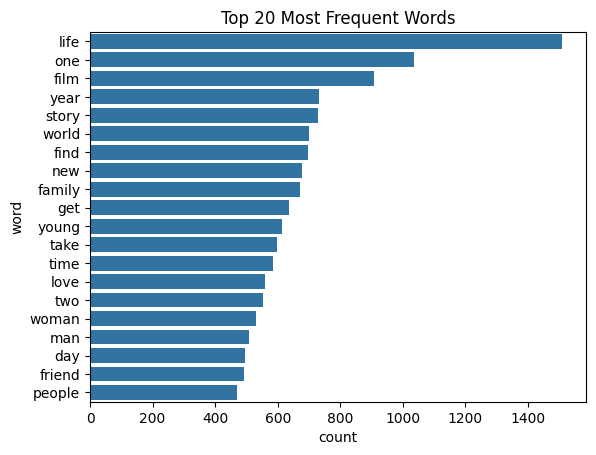

In [17]:
viz_frequent_words(X_train_clean)

## Step 4 Building a Model

In [18]:
from sklearn.linear_model import LogisticRegression

# model = LogisticRegression()
# %time model.fit(X_train_dtm, y_train)

## Step 5 Evaluating the model

In [19]:
# from sklearn.metrics import accuracy_score, f1_score

# y_train_pred = model.predict(X_train_dtm)

# print("Train accuracy : ", accuracy_score(y_train, y_train_pred))
# print("Train Score (F1 Score) : ", f1_score(y_train, y_train_pred, average='weighted')) # weighted -> Calculates metrics for each label and find average

## Evaluating on test data

In [20]:
# test_path = r"D:\My_Laptop\Downloads\CodeSoft\Genre Classification Dataset\test_data_solution.txt"
test_path = r"/content/test_data_solution.txt"

test_data = pd.read_csv(test_path, sep=" ::: ", names=column_names, engine="python")
test_data.head()

,ID,Title,Genre,Description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apart..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty chi..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family o...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with his..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a marti...


In [21]:
X_test_clean = test_data["Description"].progress_apply(lambda doc: clean(doc))

100%|██████████| 9623/9623 [00:25<00:00, 371.26it/s]


In [22]:
# X_test = test_data["Description"]
y_test = test_data["Genre"]
X_test_dtm = vectorizer.transform(X_test_clean)

# y_test_pred = model.predict(X_test_dtm)

# print("Test accuracy : ", accuracy_score(y_test, y_test_pred))
# print("Test Score (F1 Score) : ", f1_score(y_test, y_test_pred, average='weighted'))

## Step 6 Optimizing it using pipeline, caching and memoization( performing cleaning before pipelin)

In [23]:
!pip install joblib

In [27]:
from joblib import Memory

from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import make_scorer, f1_score

import warnings
warnings.filterwarnings('ignore')

# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0) # verbose=0(process runs silently without displaying any progress or detailed information)

# Define the steps in pipeline
pipelines = {
    'naive_bayes': Pipeline([
        # ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),

    'logistic_regression': Pipeline([
        # ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory),

    'Support_vector_machine': Pipeline([
        # ('vectorization', CountVectorizer()),
        ('classifier', SVC())
    ], memory=memory)
}

# Define parameter grid for each algorithm/Configuration of steps
param_grids = {
    'naive_bayes': [
        {
            # 'vectorization': [CountVectorizer()],
            # 'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__alpha' : [1, 10]
        }
    ],

    'logistic_regression': [
        {
            # 'vectorization': [CountVectorizer(), TfidfVectorizer()],
            # 'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['elasticnet'],
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ],

    'Support_vector_machine': [
         {
          #   'vectorization': [CountVectorizer(), TfidfVectorizer()],
            # 'vectorization__max_features': [1000, 2000],
            'classifier__kernel': ['linear', 'rbf'],
            'classifier__C': [1, 10],
            'classifier__gamma': ['scale', 'auto'],
        }
    ]
}

# Perform GridSearchCV for each algorithm
best_models = {}


def model_pipeline(algo):
    print()
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo],
                               param_grid=param_grids[algo],
                               cv=5,
                               scoring=make_scorer(f1_score, average='weighted'),
                               return_train_score=True,
                               verbose=1
                              )

    %time grid_search.fit(X_train_dtm, y_train)

    best_models[algo] = grid_search.best_estimator_

    print('Score on Test Data: ', grid_search.score(X_test_dtm, y_test))


for algo in tqdm(pipelines.keys()):
    model_pipeline(algo)

  0%|          | 0/3 [00:00<?, ?it/s]


********** naive_bayes **********
Fitting 5 folds for each of 2 candidates, totalling 10 fits


 33%|███▎      | 1/3 [00:00<00:01,  1.87it/s]

CPU times: user 480 ms, sys: 2.11 ms, total: 482 ms
Wall time: 477 ms
Score on Test Data:  0.2966241516949124

********** logistic_regression **********
Fitting 5 folds for each of 9 candidates, totalling 45 fits


 67%|██████▋   | 2/3 [10:52<06:23, 383.53s/it]

CPU times: user 10min 46s, sys: 572 ms, total: 10min 46s
Wall time: 10min 51s
Score on Test Data:  0.45859596458829616

********** Support_vector_machine **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: user 9min 46s, sys: 529 ms, total: 9min 46s
Wall time: 9min 50s


100%|██████████| 3/3 [20:56<00:00, 418.75s/it]

Score on Test Data:  0.44720973396020625


In [28]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

naive_bayes
Pipeline(memory=Memory(location=.cache/joblib),
         steps=[('classifier', MultinomialNB(alpha=1))])

logistic_regression
Pipeline(memory=Memory(location=.cache/joblib),
         steps=[('classifier',
                 LogisticRegression(C=10, class_weight='balanced', l1_ratio=0.4,
                                    penalty='elasticnet', solver='saga'))])

Support_vector_machine
Pipeline(memory=Memory(location=.cache/joblib),
         steps=[('classifier', SVC(C=10, kernel='linear'))])



In [35]:
import joblib
import os
from sklearn.metrics import make_scorer, f1_score

os.makedirs('best_models', exist_ok=True)

for name, model in best_models.items():
    print("*"*10, name, "*"*10)

    joblib.dump(model, f'best_models/{name}.pkl')
    model = joblib.load(f'best_models/{name}.pkl')

    %time y_test_pred = model.predict(X_test_dtm)
    print("Test Score (F1)", f1_score(y_test, y_test_pred, average='weighted'))

    print("Model Size:", os.path.getsize(f'best_models/{name}.pkl'), "Bytes")
    print()

********** naive_bayes **********
CPU times: user 12.5 ms, sys: 0 ns, total: 12.5 ms
Wall time: 12.6 ms
Test Score (F1) 0.2966241516949124
Model Size: 11199726 Bytes

********** logistic_regression **********
CPU times: user 9.36 ms, sys: 0 ns, total: 9.36 ms
Wall time: 9.38 ms
Test Score (F1) 0.45859596458829616
Model Size: 5600518 Bytes

********** Support_vector_machine **********
CPU times: user 13.9 s, sys: 18 ms, total: 13.9 s
Wall time: 14 s
Test Score (F1) 0.44720973396020625
Model Size: 3193466 Bytes

